# Búsqueda en Árboles Splay

La operación de búsqueda en un árbol Splay es única comparada con otros árboles de búsqueda binaria debido a su característica de auto-ajuste. La búsqueda no solo implica encontrar un elemento en el árbol, sino que también reorganiza el árbol de tal manera que el nodo buscado se mueve a la raíz del árbol, aprovechando la operación de splay para optimizar accesos futuros.

## Concepto de Búsqueda

La búsqueda en un árbol Splay sigue estos pasos principales:

1. **Búsqueda Estándar:** El proceso inicia como en cualquier árbol de búsqueda binaria, comparando el valor buscado con el valor del nodo actual para decidir si buscar en el subárbol izquierdo o derecho.

2. **Operación de Splay:** Independientemente de si el elemento se encuentra o no, la operación de splay se ejecuta para el último nodo accedido antes de detener la búsqueda. Esto significa que este nodo se mueve a la raíz del árbol. Si el elemento se encuentra, es splayeado a la raíz. Si no se encuentra, el último nodo visitado (el más cercano al valor buscado) se splayea a la raíz.

## Implementación en Python

A continuación, se presenta cómo podría implementarse la búsqueda en un árbol Splay en Python, aprovechando la misma estructura de árbol y las operaciones de splay definidas previamente:

Aquí te muestro cómo implementar este método en la clase [`SplayTree`](src/SplayTree.py):


In [1]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/SplayTree.py
from src.SplayTree import SplayTree

In [2]:
def search(self, data):
    # Inicializamos con el nodo raíz y preparamos una variable para recordar el
    # último visitado.
    node = self.root
    lastVisited = None

    # Recorremos los nodos del árbol para buscar el dato solicitado.
    while node:
        # Guardamos el último nodo visitado para poder realizar un "splay" si es
        # necesario.
        lastVisited = node
        # Imprimimos el valor del nodo actual para trazar la búsqueda.
        print(f"Visitando: {node.data}")

        # Decidimos en qué dirección continuar la búsqueda basándonos en el
        # valor buscado.
        if data < node.data:
            node = node.left  # Nos movemos al hijo izquierdo si el dato buscado es menor.
        elif data > node.data:
            node = node.right  # Nos movemos al hijo derecho si el dato buscado es mayor.
        else:
            # Si encontramos el nodo con el dato, realizamos la operación de
            # splay.
            print(f"Nodo encontrado: {node.data}. Realizando splay...")
            self.splay(node)  # Al encontrar el nodo, lo llevamos a la raíz.
            return node  # Retornamos el nodo encontrado.

    # Si hemos terminado el bucle sin retornar un nodo, significa que no se
    # encontró el buscado.
    if lastVisited:
        # Si había nodos en el árbol, realizamos splay en el último visitado
        # para mantener propiedades optimización.
        print(f"Nodo no encontrado. Realizando splay en el último nodo visitado: {lastVisited.data}")
        self.splay(lastVisited)
    else:
        # En caso de que el árbol esté vacío, informamos al usuario.
        print("El árbol está vacío.")

    # Retornamos None ya que no encontramos el nodo con el dato buscado.
    return None


# Extender la clase SplayTree con el nuevo método
SplayTree.search = search

## Pruebas de Búsqueda

Para probar la operación de búsqueda, puedes insertar varios elementos en el árbol y luego buscar tanto elementos que existan como algunos que no. Observa cómo después de cada búsqueda, el árbol se reorganiza, colocando el nodo buscado o el último nodo accedido en la búsqueda como la nueva raíz del árbol.


Insertar: 20


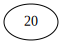

Insertar: 10
Splay - rotación a la derecha (Zig): 10
Rotación derecha: 20 ahora es la nueva raíz.


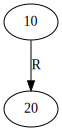

Insertar: 60
Splay - doble rotación a la izquierda (Zag-Zag): 60
Rotación izquierda: 10 ahora es la nueva raíz.
Rotación izquierda: 20 ahora es la nueva raíz.


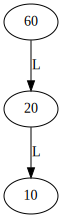

Insertar: 40
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 40
Rotación derecha: 60 ahora es la nueva raíz.


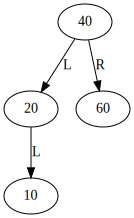

Insertar: 50
Splay - rotación a la derecha seguido de rotación a la izquierda (Zig-Zag): 50
Rotación izquierda: 40 ahora es la nueva raíz.


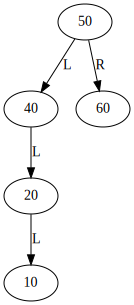

Insertar: 30
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 30
Splay - rotación a la derecha (Zig): 30
Rotación derecha: 50 ahora es la nueva raíz.


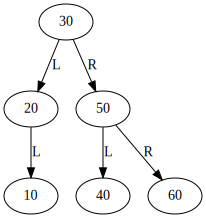

In [3]:
# Insertar algunos elementos
tree = SplayTree()
for key in [20, 10, 60, 40,  50, 30]:
    tree.insert(key)
    # Visualizar el árbol
    dot = visualize_bt(tree)
    display(dot)

Visitando: 30
Visitando: 20
Visitando: 10
Nodo no encontrado. Realizando splay en el último nodo visitado: 10
Splay - doble rotación a la derecha (Zig-Zig): 10
Rotación derecha: 30 ahora es la nueva raíz.
Rotación derecha: 20 ahora es la nueva raíz.


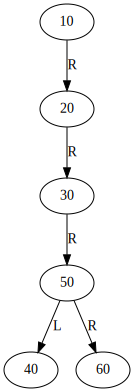

In [4]:
# Búsqueda de elementos
tree.search(9)

# Visualizar el árbol
dot = visualize_bt(tree)
display(dot)

Visitando: 10
Visitando: 20
Nodo no encontrado. Realizando splay en el último nodo visitado: 20
Splay - rotación a la izquierda (Zag): 20
Rotación izquierda: 10 ahora es la nueva raíz.


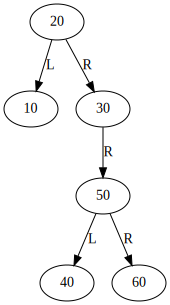

In [5]:
# Búsqueda de elementos
tree.search(15)  # Este elemento no existe en el árbol

# Visualizar el árbol
dot = visualize_bt(tree)
display(dot)

## Complejidad del Algoritmo

- **Complejidad de Tiempo:** La búsqueda en un árbol Splay tiene una complejidad de tiempo amortizada de O(log n), aunque en el peor caso puede ser O(n) para una operación individual, donde n es el número de nodos en el árbol.

- **Complejidad de Espacio:** El espacio utilizado es O(1) para la operación de búsqueda en sí, más allá del espacio O(n) requerido para almacenar el árbol.

## Ejercicios Prácticos

1. Realiza una serie de búsquedas en tu árbol Splay implementado y visualiza cómo cambia la estructura del árbol después de cada búsqueda. Observa especialmente cómo los elementos buscados se mueven hacia la raíz.
2. Experimenta con la búsqueda de elementos que no existen en el árbol y nota cuál nodo termina siendo splayeado a la raíz. Reflexiona sobre cómo esto puede afectar el rendimiento de búsquedas futuras.

Estos ejercicios te ayudarán a comprender mejor la dinámica de los árboles Splay y cómo la operación de búsqueda no solo encuentra elementos sino que optimiza el árbol para accesos futuros.
